<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


- Analyze the distribution of key variables in the dataset.

- Identify and remove outliers using statistical methods.

- Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [ ]:
# file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#clean dataset
file_url = r"D:\Back to School\Npower Canada\JDA\IBM Data Analyst Capstone Project\Lab 14 Finding Outliers/cleaned_survey_data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head(10)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
0,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,NaN,...,0.0,0.0,20.0,10.0,10.0,Appropriate in length,Easy,NaN,8.0,10-20
1,16,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,5.0,>20
2,19,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,10.0,10.0,0.0,0.0,0.0,Appropriate in length,Easy,NaN,10.0,10-20
3,23,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Stack Overflow;AI,...,20.0,0.0,20.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,9.0,10-20
4,25,I am a developer by profession,35-44 years old,"Employed, full-time;Student, part-time",Remote,Apples,Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Blogs;Books;Stack Overflow;Social Media;How-to...,...,0.0,0.0,60.0,0.0,0.0,Appropriate in length,Easy,NaN,4.0,10-20
5,27,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,NaN,...,20.0,10.0,5.0,10.0,10.0,Appropriate in length,Neither easy nor difficult,NaN,7.0,10-20
6,28,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;On the job training,NaN,...,20.0,15.0,15.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,7.0,5-10
7,32,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;On the job training;School (i.e., Un...",NaN,...,50.0,30.0,20.0,0.0,0.0,Appropriate in length,Easy,NaN,7.0,5-10
8,34,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Stack Overflow;Video-b...,...,15.0,20.0,0.0,0.0,25.0,Appropriate in length,Neither easy nor difficult,NaN,6.0,10-20
9,36,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Freelance/contract work,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Written Tutorials;Stac...,...,10.0,20.0,5.0,0.0,10.0,Appropriate in length,Easy,NaN,7.0,5-10


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\alija\AppData\Local\Temp\ipykernel_39492\1851927230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


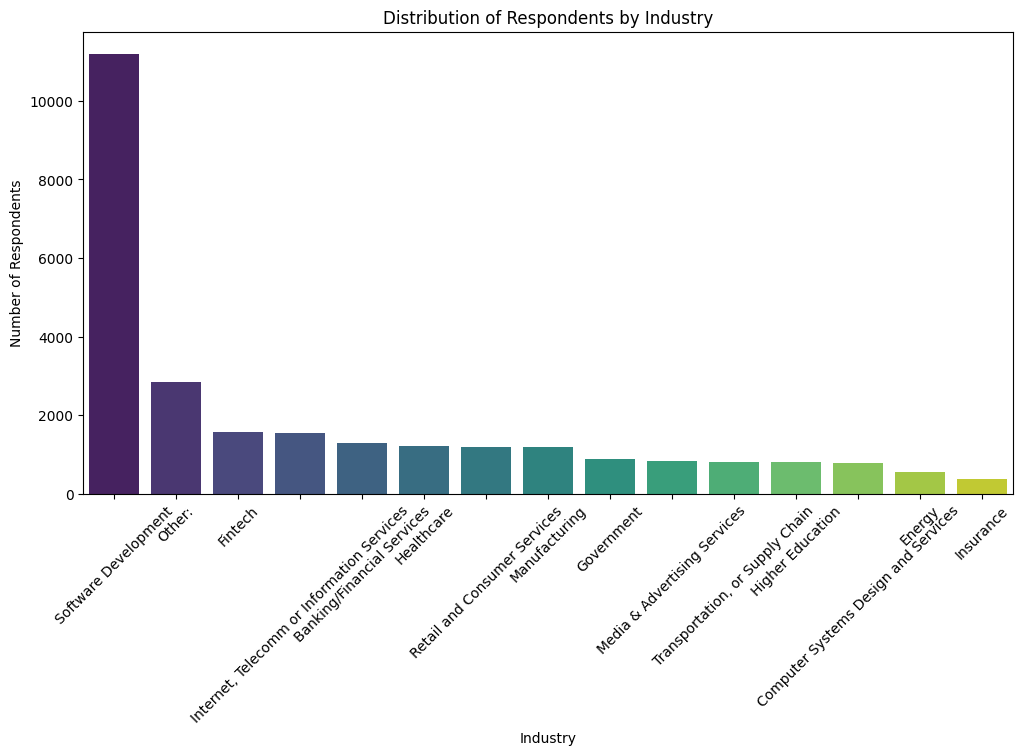

Industry
Software Development                          11203
Other:                                         2854
Fintech                                        1560
Internet, Telecomm or Information Services     1536
Banking/Financial Services                     1276
Healthcare                                     1206
Retail and Consumer Services                   1192
Manufacturing                                  1175
Government                                      879
Media & Advertising Services                    841
Transportation, or Supply Chain                 808
Higher Education                                793
Computer Systems Design and Services            782
Energy                                          545
Insurance                                       370
Name: count, dtype: int64

In [17]:
##Write your code here
# Plot the distribution of respondents by industry
plt.figure(figsize=(12, 6))
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()
industry_counts


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [15]:
##Write your code here
# Calculate basic statistics for ConvertedCompYearly
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean: {mean_comp}, Median: {median_comp}, Standard Deviation: {std_comp}")

# Define the threshold for high compensation outliers
threshold = mean_comp + 3 * std_comp

# Identify high compensation outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"Number of high compensation outliers: {high_comp_outliers.shape[0]}")
high_comp_outliers.head()

Mean: 87312.59542475261, Median: 67666.0, Standard Deviation: 173880.3885245314
Number of high compensation outliers: 61


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
257,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0,10-20
406,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0,10-20
964,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0,0-5
1085,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0,10-20
1089,2178,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,15.0,5.0,0.0,15.0,Too long,Neither easy nor difficult,639000.0,7.0,10-20


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers: 631


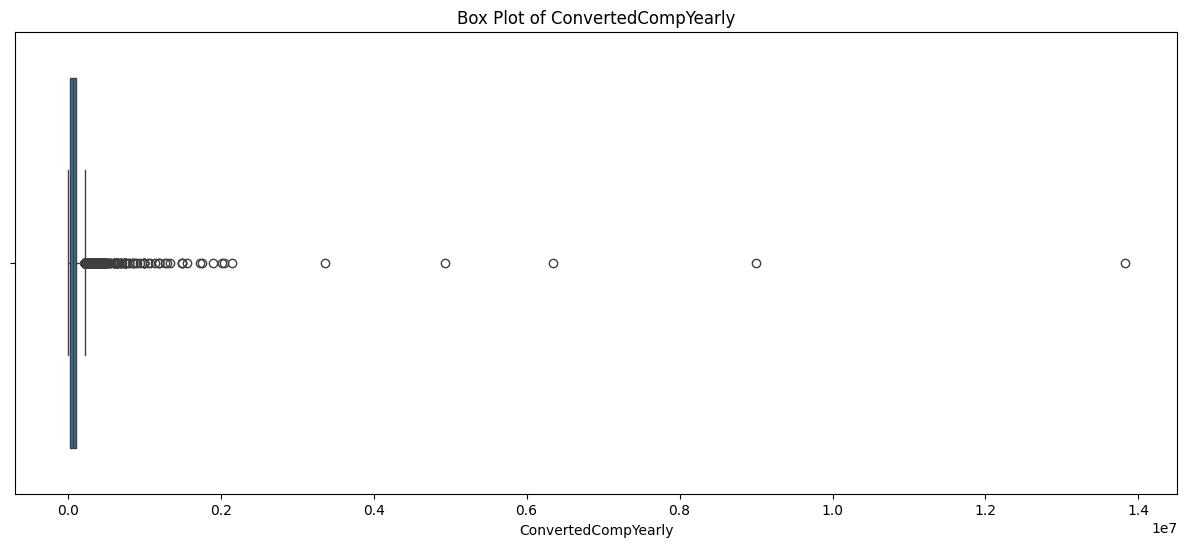

In [19]:
##Write your code here
# Calculate the Interquartile Range (IQR) for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")

# Visualize outliers using a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [20]:
##Write your code here
# Create a new DataFrame excluding rows with outliers in ConvertedCompYearly
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape[0]}")
print(f"New DataFrame size after removing outliers: {df_no_outliers.shape[0]}")
df_no_outliers.head()

Original DataFrame size: 27353
New DataFrame size after removing outliers: 14931


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
24,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0-5
174,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,5-10
180,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,5-10
182,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,10-20
186,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,>20


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


C:\Users\alija\AppData\Local\Temp\ipykernel_39492\2051120517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['AgeNumeric'] = df_no_outliers['Age'].map(age_mapping)


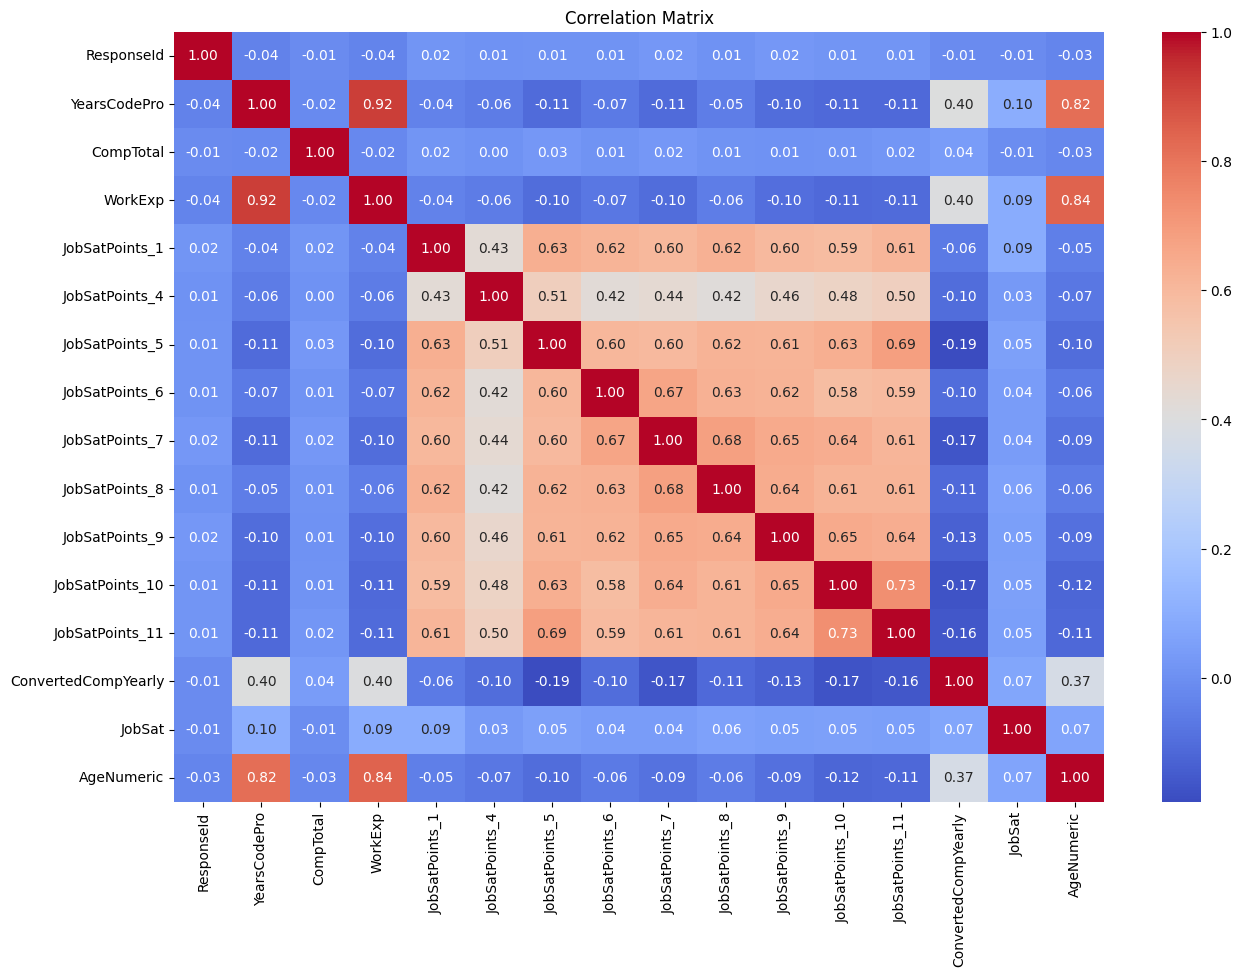

                     ResponseId  YearsCodePro  CompTotal   WorkExp  \
ResponseId             1.000000     -0.040021  -0.014401 -0.036610   
YearsCodePro          -0.040021      1.000000  -0.018503  0.923756   
CompTotal             -0.014401     -0.018503   1.000000 -0.019541   
WorkExp               -0.036610      0.923756  -0.019541  1.000000   
JobSatPoints_1         0.017066     -0.039912   0.017714 -0.038876   
JobSatPoints_4         0.005521     -0.058838   0.004494 -0.060084   
JobSatPoints_5         0.009996     -0.105869   0.026163 -0.099431   
JobSatPoints_6         0.012673     -0.065943   0.011427 -0.071881   
JobSatPoints_7         0.023231     -0.107573   0.022783 -0.103163   
JobSatPoints_8         0.007812     -0.052366   0.010394 -0.055473   
JobSatPoints_9         0.024603     -0.098684   0.007074 -0.095996   
JobSatPoints_10        0.013902     -0.111416   0.011689 -0.110954   
JobSatPoints_11        0.013495     -0.109386   0.018552 -0.107351   
ConvertedCompYearly 

In [24]:
##Write your code here
# Map the Age column to approximate numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
df_no_outliers['AgeNumeric'] = df_no_outliers['Age'].map(age_mapping)

# Select only numeric columns for correlation
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Compute correlations between Age and other numeric variables
correlation_matrix = numeric_df.corr()


# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
